In [1]:
cd  /Users/driscoll/Documents/GitHub/fnc/matlab
FNC_init

[**Demo %s**](#demo-methodlines-heatFE)

Let's implement the method of {numref}`Example {number} <example-methodlines-heatFE>` with second-order space semidiscretization.

In [2]:
m = 100;  
[x, Dx, Dxx] = diffper(m, [0, 1]);
Ix = eye(m);

Next we set an initial condition. It isn't mathematically periodic, but the end values and derivatives are so small that for numerical purposes it may as well be.

In [3]:
tfinal = 0.15;  n = 2400;  
tau = tfinal / n;  t = tau * (0:n)';
U = zeros(m, n+1);
U(:, 1) = exp( -60*(x - 0.5).^2 );

The Euler time stepping simply multiplies the solution vector by the constant matrix in {eq}`Eulerxx` at each time step. Since that matrix is sparse, we will declare it as such, even though the run-time savings may not be detectable for this small value of $m$.

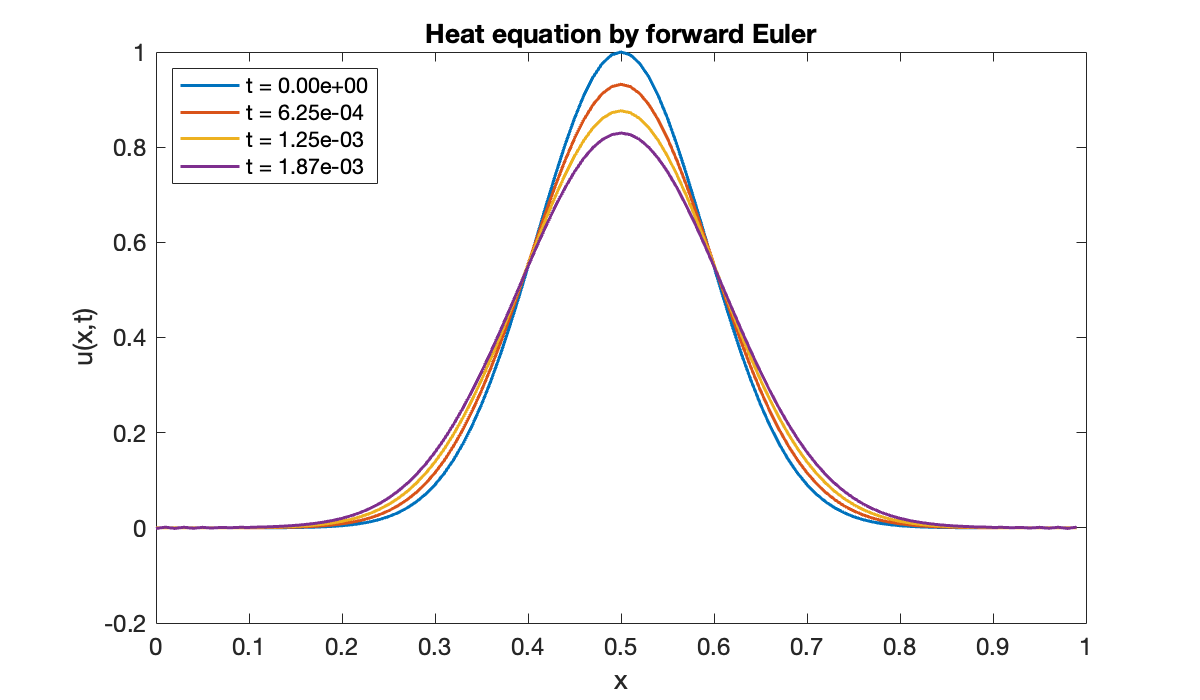

In [4]:
A = sparse(Ix + tau * Dxx);
for j = 1:n
    U(:, j+1) = A * U(:,j);
end

index_times = 1:10:31;
show_times = t(index_times);
clf
for j = index_times
    str = sprintf("t = %.2e", t(j));
    plot(x, U(:, j), displayname=str) 
    hold on
end
legend(location="northwest")
xlabel('x'), ylabel('u(x,t)')
title('Heat equation by forward Euler')

You see above that things seem to start well, with the initial peak widening and shrinking. But then there is a nonphysical exponential growth in the solution.

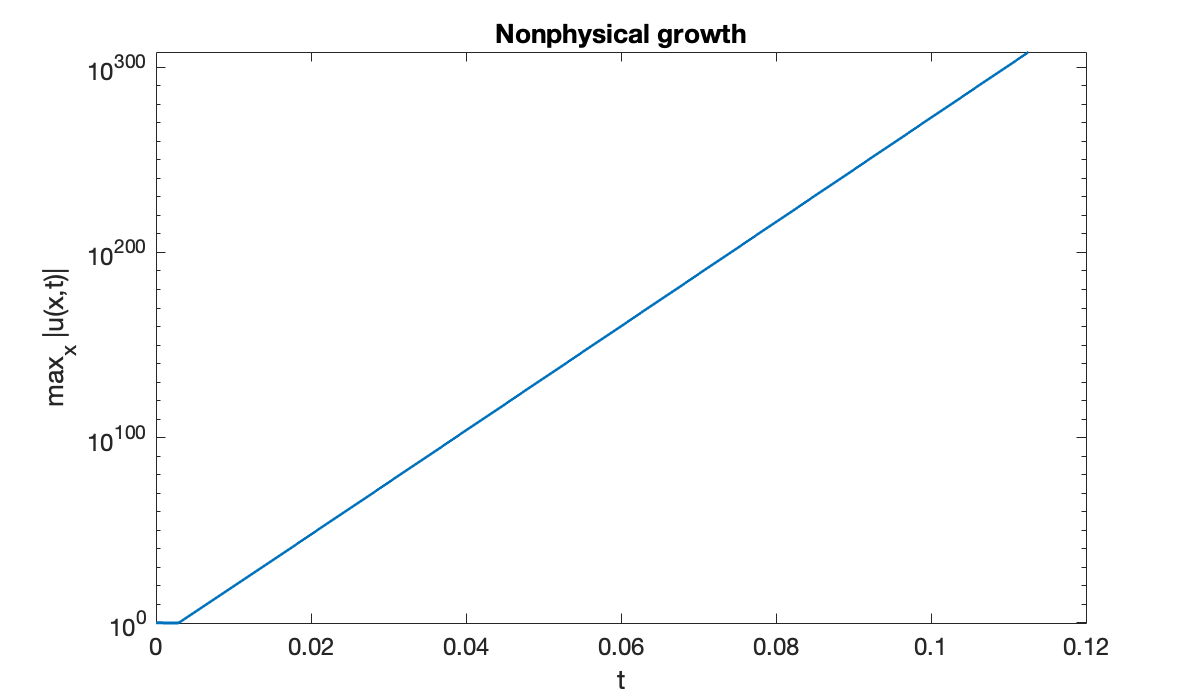

In [6]:
M = max(abs(U), [], 1);     % max in each column
clf,  semilogy(t, M)
xlabel('t'), ylabel('max_x |u(x,t)|') 
title('Nonphysical growth')

In [ ]:
clf
index_times = 1:101;
plot(x, U(:, 1))
hold on,  grid on
axis([0, 1, -1, 2])
title('Heat equation by forward Euler') 
xlabel('x'),  ylabel('u(x,t)')
vid = VideoWriter("figures/diffusionFE.mp4", "MPEG-4");
vid.Quality = 85;
open(vid);
for frame = index_times
    cla, plot(x, U(:, frame))
    str = sprintf("t = %.3f", t(frame));
    text(0.05, 0.92, str);
    writeVideo(vid, frame2im(getframe(gcf)));
end
close(vid)